<h1> Seleção de atributos baseado em métricas</h1>

<p> O objetivo geral desse caderno é realizar uma análise de dados no Student Performance Dataset, queremos descobrir as variaveis categóricas que mais influênciam ao dizer se um aluno foi reprovado ou não. Dito isso, considera-se que um aluno foi aprovado se ele obteve uma média de math score, reading score e writing score acima de 70 </p>
<p> Será feita uma medição da força de influência das variáveis utilizando estatística e modelos de classificação (logistic regression, support vector classifier, decision trees e random forest). A partir disso podemos encontrar um padrão nos dados para melhor classificá-los   </p>

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lendo o dataset
path = r"C:\Users\talis\Google Drive\Estudos pessoais\datascience\datasets\StudentsPerformance.csv"
df = pd.read_csv(path)

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.shape

(1000, 8)

In [6]:
#verificando dados nulos
(df.isnull().sum()/df.shape[0])*100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [5]:
#para facilitar a escrita vamos modificar o nome de algumas colunas
df.rename(columns={"parental level of education":"parental_level_of_education","test preparation course":'test_preparation_course',
               "math score":"math_score","reading score":"reading_score","writing score":"writing_score"},inplace=True)
df.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#vamos considerar que um estudante aprovado é aquele que tem a media de math_score,reading_score e writing_score 
#acima de 70
# 1 significa que o aluno foi aprovado e 0 que o aluno foi reprovado
df["status"] = (df["math_score"]+df["reading_score"]+df["writing_score"])/3
df["status"] = df["status"].apply(lambda x: 1 if (x>=70) else 0)
df.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,status
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [9]:
#vamos fazer algumas analises, primeiro vamos verificar a % de aprovados
(df.groupby(["status"]).size()/df.shape[0])*100

status
0    54.1
1    45.9
dtype: float64

C:\Users\talis\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


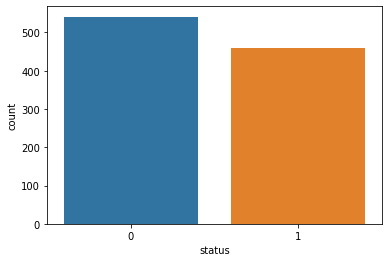

In [10]:
sns.countplot("status",data=df)

<p> Como podemos observar temos um diferença entre a quantidade de classes, com uma quantidade menor de aprovados em relação aos reprovados. Isso deverá ser levado em conta quando se fazer um modelo preditivo. Antes disso, vamos vamos fazer uma analise descritiva dos dados </p>

In [11]:
#vamos verificar a % de aprovados por grupo
((df[df["status"]==1].groupby(df["race/ethnicity"]).size())/(df.groupby(["race/ethnicity"]).size()))*100

race/ethnicity
group A    28.089888
group B    38.421053
group C    44.514107
group D    50.381679
group E    62.142857
dtype: float64

In [12]:
#vamos verificar a % de reprovados por race/ethnicity
((df[df["status"]==0].groupby(df["race/ethnicity"]).size())/(df.groupby(["race/ethnicity"]).size()))*100

race/ethnicity
group A    71.910112
group B    61.578947
group C    55.485893
group D    49.618321
group E    37.857143
dtype: float64

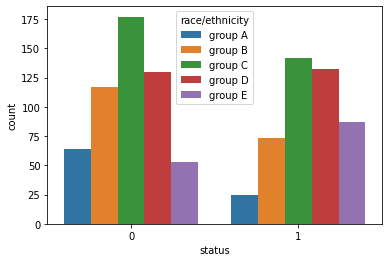

In [13]:
#visualizando os dados de race/ethnicity em grafico
sns.countplot(x="status",hue = "race/ethnicity",data=df.sort_values(["race/ethnicity"],ascending=True),palette="tab10")

In [14]:
#quantidade de aprovados e reprovados por genero
df.groupby(["gender","status"]).size()

gender  status
female  0         250
        1         268
male    0         291
        1         191
dtype: int64

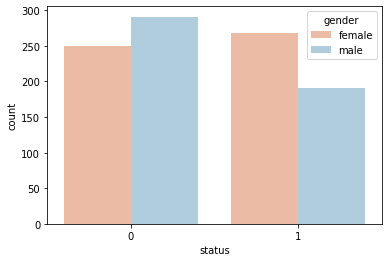

In [15]:
#aqui podemos perceber um fator interessante, dentro do numero de aprovados temos uma maior quantidade de mulheres e nos de 
#reprovados temos uma quantidade maior de homens 
sns.countplot(x="status",hue = "gender",data=df,palette="RdBu")

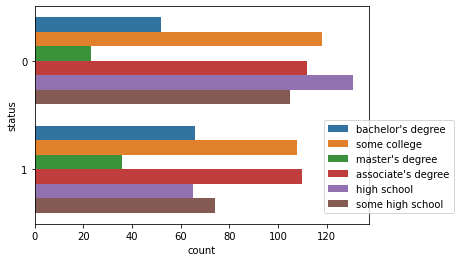

In [15]:
#vamos verificar a relação entre status e parental_level_of_education
sns.countplot(y="status",hue = "parental_level_of_education",data=df,orient="h")
plt.legend(bbox_to_anchor=(.85,.5))

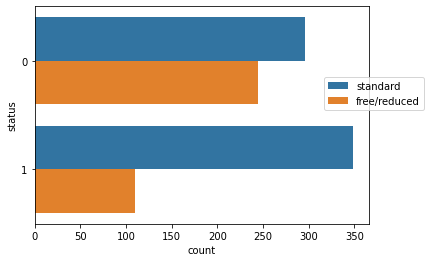

In [16]:
#vamos verificar a relação entre aprovados e slunch
sns.countplot(y="status",hue = "lunch",data=df,orient="h")
plt.legend(bbox_to_anchor=(.85,.5))

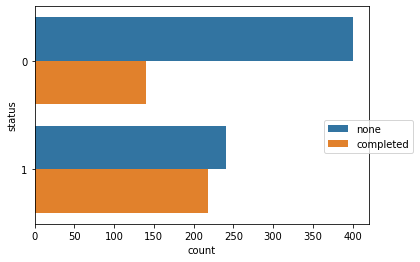

In [17]:
sns.countplot(y="status",hue = "test_preparation_course",data=df,orient="h")
plt.legend(bbox_to_anchor=(.85,.5))

<p> Com base nos dados podemos afirmar que muitos dos alunos aprovados tem pais com escolaridade maior do que o ensino medio apesar de ter uma parcela significativa de pais somente com ensino medio, além disso muitos apresentaram boas condições de alimentação e percebe-se que muitos não tiveram curso prepatorio mas uma parcela significativa tambem realizou curso. </p>

<p> Em relação aos reprovados é visto que uma parcela grande dos pais tem apenas ensino medio, muitos não realizaram curso preparatorio e uma parcela significativa teve comida reduzida,ou seja, é possivel que muitos dos alunos com notas baixas estejam em situação economica desfavorável. </p>

<p> É importante analisar também, muito dos grupos reprovados são parte do grupo A,B,C e muitos aprovados são do grupo D e E. Em relação ao genero é visto uma quantidade maior de mulheres aprovadas e uma quantidade maior de homens reprovados.  </p>

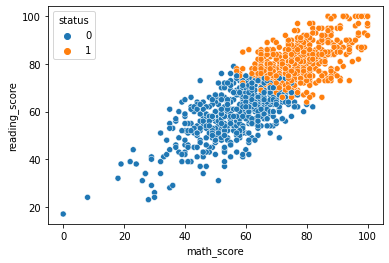

In [18]:
#verificando a relação entre reading score e math score
sns.scatterplot(x="math_score",y="reading_score",hue="status",data=df)

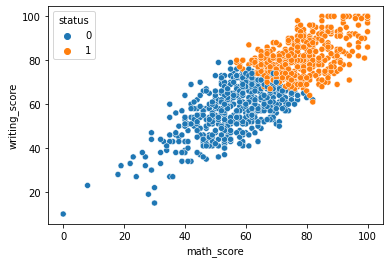

In [19]:
#verificando a relação entre writing score e math score
sns.scatterplot(x="math_score",y="writing_score",hue="status",data=df)

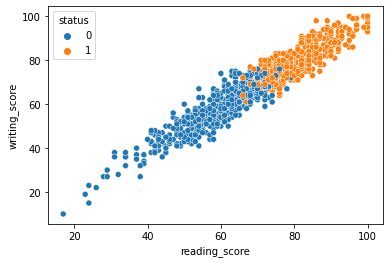

In [20]:
#verificando a relação entre reading_score e writing_score
sns.scatterplot(x="reading_score",y="writing_score",hue="status",data=df)

C:\Users\talis\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


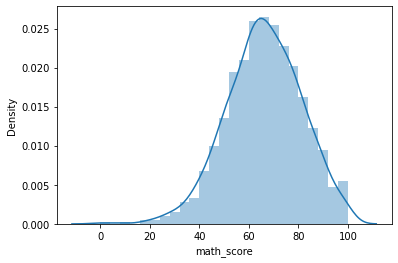

In [21]:
#Vendo a distribuição de math score
sns.distplot(df["math_score"])

C:\Users\talis\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


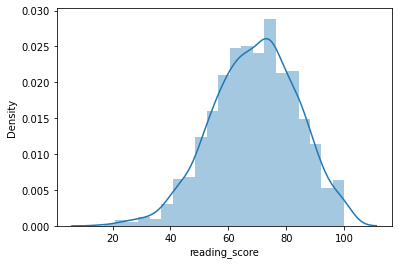

In [22]:
#Vendo a distribuição de reading score
sns.distplot(df["reading_score"])

C:\Users\talis\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


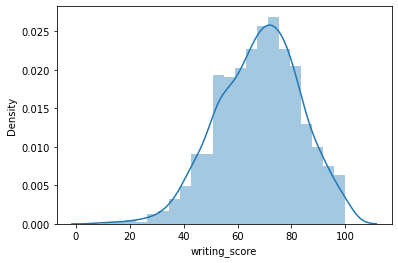

In [23]:
#dist de writing score
sns.distplot(df["writing_score"])

In [24]:
#verificando a descrição de dados 
df[["math_score","writing_score","reading_score"]].describe()

,math_score,writing_score,reading_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.054000,69.169000
std,15.16308,15.195657,14.600192
min,0.00000,10.000000,17.000000
25%,57.00000,57.750000,59.000000
50%,66.00000,69.000000,70.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


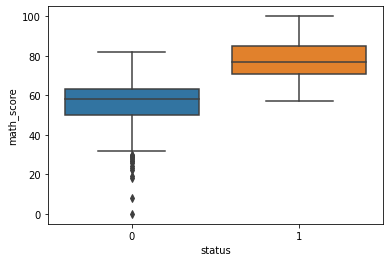

In [25]:
#verificando a relação das materias com a aprovação 
sns.boxplot(x="status",y="math_score",data=df)

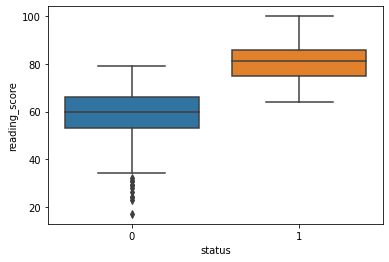

In [26]:
#verificando a relação das materias com a aprovação 
sns.boxplot(x="status",y="reading_score",data=df)

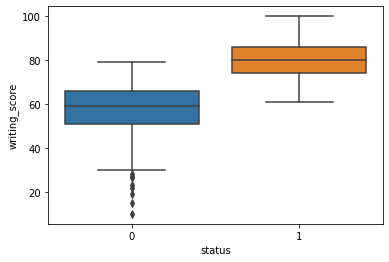

In [26]:
#verificando a relação das materias com a aprovação 
sns.boxplot(x="status",y="writing_score",data=df)

<p>Podemos afirmar visualizando os boxplots e o gráfico de distribuição que as notas dos aprovados e dos reprovados apresentam uma certa diferença na media conforme o esperado. Dito isso, é interessante analisar
como os dados são distribuidos através das avaliações. </p>
<p> Em math score podemos visualizar que em relação aos alunos aprovados as notas muito altas acontecem com menor frequência já que temos uma assimetria positiva, ou seja, os alunos obteram notas boas dentro do valor esperado para serem aprovados. Dito isso, a distribuição dos alunos reprovados nessa disciplina mostra uma assimetria negativa, ou seja, temos uma concentração de valores altos para esse grupo mas ainda sim as notas são abaixo da necessária para a aprovação. </p>
<p>Em reading score e writing score podemos ver que os alunos aprovados tem desempenho similar com uma relativa diferença no primeiro onde existe uma maior quantidade de alunos com notas mais acima da média para esse grupo. Em relação aos alunos reprovados, para essas disciplinas, temos rendimento similar novamente, contudo, vimos que esses tiveram menos dificuldade em wirting já que existe uma maior quantidade de alunos com notas acima da media para esse grupo.</p>

<h3>Analisando a relação entre variáveis</h3>

<p> O teste chi quadrado é realizado para analisar a relação entre duas variaveis categoricas, a partir de uma tabela de contigencia que contém os valores observados é feita uma medição que analisa a proporção dos valores (dado uma quantidade de variaveis n temos X<sup>2</sup> = (QtdeObservada<sub>1</sub> -QtdeEsperada<sub>1</sub>)<sup>2</sup>/QtdeEsperada<sub>1</sub>) + ... (QtdeObservada<sub>N</sub> -QtdeEsperada<sub>N</sub>)<sup>2</sup>/QtdeEsperada<sub>N</sub>)) quanto maior for o valor de X<sup>2</sup>  verifica-se uma relação significativa entre as variaveis. </p>

<p>No python existe uma função chi_contingency na qual é calculado tanto o valor X<sup>2</sup> e o p-value. Esse último 
é utilizado como um outro parâmetro de referência para o teste de chi quadrado, se p < 0.05 significa que 
as variáveis estão relacionads entre si</p>

In [27]:
#teste de relação entre "race/ethnicity" e status
#aqui vemos a tabela de contigência entre race/ethnicity e status
df.groupby(["race/ethnicity","status"]).size().unstack()

status,0,1
race/ethnicity,,
group A,64,25
group B,117,73
group C,177,142
group D,130,132
group E,53,87


In [29]:
from scipy.stats import chi2_contingency

In [30]:
#analisando relação entre course preparation e status
df.groupby(["test_preparation_course","status"]).size().unstack()

status,0,1
test_preparation_course,,
completed,140,218
none,401,241


<p> A função teste_chi2 calcula o valor de influência de cada váriavel categórica(X<sup>2</sup>) e retorna uma lista em ordem
crescente das variáveis mais relacionadas com a variável alvo. Caso se queira selecionar apenas algumas variáveis
basta utilizar o kwargs com chave igual a "n_order" para selecionar apenas K variáveis principais para a análise.</p>

In [31]:
from collections import namedtuple
def sort_method(data):
    return data.chi2
def teste_chi2(X,Y,**kwargs):
    lista_chi2 = []
    for column in X.columns:
        result = chi2_contingency(df.groupby([column,Y.name]).size().unstack())
        data = namedtuple("data",["column","chi2","pvalue"])
        d = data(column=column,chi2=result[0],pvalue=result[1])
        lista_chi2.append(d)
    
    lista_chi2.sort(key=sort_method)
    for k,v in kwargs.items():
        if (k == "n_order" and v>=1):
            n_order = v
            return lista_chi2[-n_order:]
    return lista_chi2

In [32]:
#selecionando as três variáveis principais 
threeBest = teste_chi2(df.iloc[:,0:5],df.iloc[:,8],**{"n_order":3})
print(threeBest)

[data(column='race/ethnicity', chi2=32.889042672152414, pvalue=1.2586187099584232e-06), data(column='lunch', chi2=48.37379515074998, pvalue=3.522439283980204e-12), data(column='test_preparation_course', chi2=49.549125506771205, pvalue=1.9346607961165553e-12)]


In [33]:
chi2_variaveis = teste_chi2(df.iloc[:,0:5],df.iloc[:,8])
chi2_variaveis

[data(column='gender', chi2=14.263850082132878, pvalue=0.00015888726667783086),
 data(column='parental_level_of_education', chi2=26.03015123959003, pvalue=8.804245452543673e-05),
 data(column='race/ethnicity', chi2=32.889042672152414, pvalue=1.2586187099584232e-06),
 data(column='lunch', chi2=48.37379515074998, pvalue=3.522439283980204e-12),
 data(column='test_preparation_course', chi2=49.549125506771205, pvalue=1.9346607961165553e-12)]

<p> Vamos agora utilizar outros modelos estatísticos que analisam quais dessas variáveis mais ajudam a prever se um aluno foi aprovado ou não. Para os modelos lineares existe a regressão lasso na qual muito dos coeficientes são zerados, ou, ficam entre -1 e 1 , e então, pode-se verificar quais variáveis são mais influentes para o modelo. Logo, ajustando o valor de C medimos quão forte é essa regularização e analisamos seus resultados. Por fim, os modelos baseados em árvores também medem a força de influência das variáveis através do feature importance, no qual, atráves da medição do ganho de informação verifca-se quais delas melhor segmentam os grupos para a classificação.  </p>
<p>Nos próximos passos a seguir vamos analisar os hyperparamêtros para obter os melhores modelos que se ajustam os dados e verificar quais foram as conclusões obtidas por eles </p>

In [7]:
#importando bibliotecas necessárias
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve

In [11]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import confusion_matrix

In [12]:
#configurando o cross validation
KFolds = KFold()
#criando os valores de C baseado na base 10  
C_vals_exponents = np.linspace(-1,0,7)
C_vals = np.float(10)**C_vals_exponents

In [13]:
KFolds.n_splits

5

In [14]:
C_vals

array([0.1       , 0.14677993, 0.21544347, 0.31622777, 0.46415888,
       0.68129207, 1.        ])

In [15]:
#Separando os dados entre variáveis(X) e target(Y)
#aqui as variáveis categóricas 
dummies_categorical_variables = pd.get_dummies(df.iloc[:,0:5])
dummies_categorical_variables

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [16]:
X = dummies_categorical_variables
Y = df["status"]

In [17]:
X.head(5)

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [18]:
Y.head(5)

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int64

<p> Abaixo temos os métodos de grid search/cross validation para determinar o valor de C para a regularização lasso. Será utilizado o método de cross validation no qual se dividirá o dataset em 5 divisões e cada uma dessas divisões tem sua parte de teste e outra de treino. Para cada uma, será feito o grid search para encontrar o melhor valor de C em cada conjunto. Ao final, o valor de C mais repetido será o escolhido para fazer o modelo em todo o conjunto de treinamento. </p>

In [19]:
def cross_val_C_selection_grid_search(model,X,Y,KFolds,get_params):
    n_folds = KFolds.n_splits
    results = {"C":[],"mean_train_scores":[],"mean_test_scores":[]}
    for train_index,test_index in KFolds.split(X,Y):
        X_cv_train,X_cv_test = X.loc[X.index.intersection(train_index)],X.loc[X.index.intersection(test_index)]
        y_cv_train,y_cv_test = Y.loc[Y.index.intersection(train_index)],Y.loc[Y.index.intersection(test_index)]
        
        #searching the best param for that split 
        clf = GridSearchCV(model,get_params,scoring="roc_auc")
        clf.fit(X_cv_train,y_cv_train)
        
        
        #getting the best C
        best_C = clf.best_params_["C"]
        
        #creating a model with the best C and tuning params
        model.C = best_C
        model.fit(X_cv_train,y_cv_train)
        results["C"].append(best_C)
        
        #adding the mean train score 
        results["mean_train_scores"].append(clf.best_score_)
        
        #getting the mean test score
        mean_test_scores = cross_val_score(model,X_cv_test,y_cv_test,cv=5,scoring="roc_auc")
        results["mean_test_scores"].append(np.mean(mean_test_scores))

    return results

In [20]:
#dividindo os dados em treinamento e teste 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train[0:5]

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
29,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
535,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
695,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
557,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
836,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


<p> É importante destacar que o dataset é desembalanceado, ou seja, as classes de reprovados e aprovados 
não estão em igual quantidade. Pela análise feita sabe-se que temos uma maior quantidade de reprovados (cerca de 54.1%). Logo, para os modelos terem melhor desempenho é necessário fazer um balanceamento de classes realizando um oversample, ou seja, acrescentar mais dados.</p>
<p> Existem vários métodos para realizar essa tarefa um deles é o borderline, onde, mais exemplos da classe minoritária são adicionados, através de dois passos: 1 - Encontrar regiões em perigo, na qual, dado um valor de sample Xi e seus K-vizinhos, pelo menos, metade deles tem classe igual a Xi. 2 - Encontrada as regiões em perigo, é feito um <a href="https://imbalanced-learn.org/stable/over_sampling.html">cálculo</a>, considerando Xi e seus vizinhos para gerar um novo valor de sample.  </p>

In [22]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE(random_state=0).fit_resample(X, Y)

In [23]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

<p>O primeiro modelo a ser estudado foi o logistic regression  </p>

In [24]:
log_reg_model = LogisticRegression(penalty="l1",solver="liblinear",tol=0.001,random_state=42)
log_reg_model

LogisticRegression(penalty='l1', random_state=42, solver='liblinear', tol=0.001)

In [25]:
#procurando o melhor paramêtro de C para o modelo de logistic regression 
cross_val_C_selection_grid_search(log_reg_model,X2_train,y2_train,KFolds,{"C":C_vals})

{'C': [1.0, 0.6812920690579611, 1.0, 1.0, 0.46415888336127786],
 'mean_train_scores': [0.6963096967600599,
  0.7062917586706814,
  0.7014920903954801,
  0.713521332554062,
  0.7206640522875818],
 'mean_test_scores': [0.7148798076923077,
  0.6434065934065935,
  0.6879513888888888,
  0.6483733974358975,
  0.5278968253968255]}

<p> Com base na busca feita acima vimos que C = 1 se adaptou aos dados melhor para a regressão logística. Assim vamos utilzá-lo para analisar os pesos das variáveis de X para classificar os dados. </p>

In [26]:
clf_test = log_reg_model 
clf_test.C = 1
clf_test = log_reg_model.fit(X2_train,y2_train)

In [27]:
y_clf_scores = clf_test.predict_proba(X2_test)

<p> A partir disso é necessário verificar outras métricas da classificação do modelos estudados: precision e recall. Ambas respondem a perguntas parecidas mas com sutís diferenças. A primeira, procura responder: A partir dos meus dados classificados como aprovados, qual a quantidade deles são verdadeiramente aprovados? Já a segunda responde: em relação a minha base de dados, qual a quantidade de verdadeiramente aprovados o modelo conseguiu classificar?. A imagem acima ilustra como os cálculos são feitos para essas medidas. </p>
<p>Precision e recall, então, analisam diferentes problemas para a avaliação dos modelos, uma precision alta signfica que temos poucos falsos positivos (dados classificados como aprovado mas na verdade são alunos reprovados), já um recall alto diz que temos poucos falsos negativos (dados classificados como reprovados mas na verdade são alunos aprovados). Logo, dependendo do problema é importante verificar quais desses paramêtros deve ser alto. Para um problema na área de saúde, ter um falso negativo é preocupante (pode indicar uma doença não identificada por exemplo),logo, um recall alto é necessário, já para área de negócios, falso positivos são ruins (isso indica um gasto que não trouxe retorno), portanto, um valor alto de precision é importante. </p>
<p> Com base no exposto é importante lembrar o objetivo dessa análise de dados: verificar quais são as variáveis categóricas mais importantes para definir se um aluno foi aprovado ou não, aqui, ter um falso negativo é um problema maior do que ter um falso positivo, pois indica que o modelo não foi assertivo em garantir que todos alunos aprovados fossem corretamente classificados.  <p>
<p> Dito isso, abaixo terá o plote da curva de precision e recall para analisar quando temos um alto recall ou alta precisão a partir de diferentes limiares de decisão. Assim, conseguimos encontrar um ponto de equilíbrio entre essas duas métricas.  </p>

In [28]:
p,r,th = precision_recall_curve(y2_test,y_clf_scores[:,1])

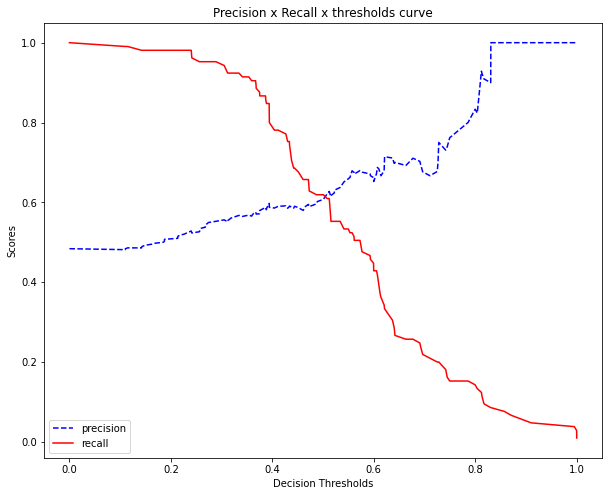

In [29]:
plt.figure(figsize=(10,8))
plt.title("Precision x Recall x thresholds curve")
plt.plot(th,p[:-1],'--',label="precision",color="blue")
plt.plot(th,r[:-1],'-',label="recall",color="red")
plt.ylabel("Scores")
plt.xlabel("Decision Thresholds")
plt.legend(loc="best")

<p>Para esse modelo de logistic regression, um bom ponto de equilíbrio de precision e recall ocorre com 
uma decision threshold abaixo de 0.5, em torno de 0.45 e 0.4, para obtermos um recall em torno de 70 % e precision proximo de 60%. Abaixo vamos verificar os resultados obtidos para esse valor. </p>

In [30]:
clf_test

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear',
                   tol=0.001)

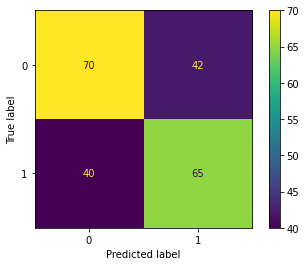

In [31]:
y_pred = clf_test.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

<p> Aqui vamos definir uma função adjusted_scores para modificar a classificação de acordo com a probabilidade calculada de uma instância pertencer a classe. No caso, o padrão de decision threshold para uma instancia pertencer a uma classe é ela ter 51% de probabilidade dela pertencer a mesma. Dito isso, o que essa função irá fazer é dimunuir ou aumentar esse valor.  </p>

In [32]:
def adjusted_scores(y_scores,t):
    return [1 if y>=t else 0 for y in y_scores]

In [33]:
y_pred_adj = adjusted_scores(y_clf_scores[:,1],0.43)


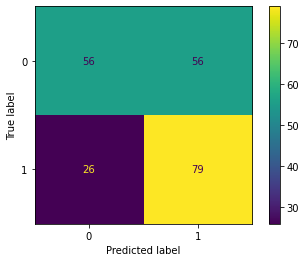

In [34]:
cm2 = confusion_matrix(y2_test, y_pred_adj)

cm2_display = ConfusionMatrixDisplay(cm2).plot()

In [35]:
#aplicando no dataset real esse modelo com valor de decision thresold para 0.45 
y_clf_scores_2 = clf_test.predict_proba(X_test)

In [36]:
y_pred_adj2 = adjusted_scores(y_clf_scores_2[:,1],0.46)

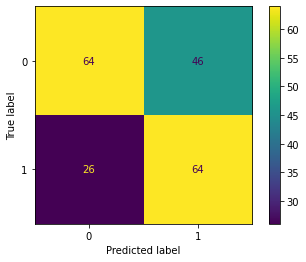

In [37]:
cm3 = confusion_matrix(y_test, y_pred_adj2)

cm3_display = ConfusionMatrixDisplay(cm3).plot()

<p>Criando o modelo de linear SVC. Ele é o algoritmo de support vector machines aplicado a classificação. Logo, sua função sera encontrar a reta que melhor segmenta o espaço</p>

In [38]:
from sklearn.svm import LinearSVC
svc = LinearSVC(penalty="l1",C=1,tol=0.001,loss="squared_hinge",dual=False,random_state=0)
svc

LinearSVC(C=1, dual=False, penalty='l1', random_state=0, tol=0.001)

In [39]:
#criando os valores de C baseado na base 10  
C_vals_exponents_svc = np.linspace(-1,0,5)
C_vals_svc = np.float(10)**C_vals_exponents_svc

In [40]:
results_svc = cross_val_C_selection_grid_search(svc,X2_train,y2_train,KFolds,{"C":C_vals_svc})
results_svc

{'C': [1.0, 0.1, 0.5623413251903491, 0.31622776601683794, 0.1],
 'mean_train_scores': [0.6973641185287673,
  0.7069442845990856,
  0.7026271186440678,
  0.7146691992986558,
  0.7213640522875816],
 'mean_test_scores': [0.7129674145299145,
  0.596153846153846,
  0.6910870726495727,
  0.6395993589743589,
  0.48583333333333334]}

<p>Aqui o melhor valor de C é de 0.1 para o LinearSVC </p>

In [41]:
best_C = results_svc["C"][1]
svc_test = svc
svc_test.C = best_C
svc_test

LinearSVC(C=0.1, dual=False, penalty='l1', random_state=0, tol=0.001)

In [42]:
svc_test.fit(X2_train,y2_train)

LinearSVC(C=0.1, dual=False, penalty='l1', random_state=0, tol=0.001)

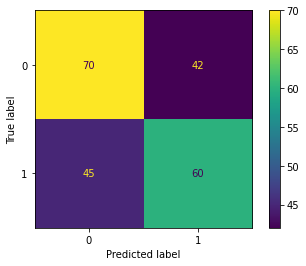

In [43]:
y_pred_svc = svc_test.predict(X2_test)
cm_svc = confusion_matrix(y2_test, y_pred_svc)

cm_svc_display = ConfusionMatrixDisplay(cm_svc).plot()

In [44]:
from sklearn.calibration import CalibratedClassifierCV
#criando o classificador calibrated classifier para poder utilizar o predict_proba para modificar o decision
#thresold já que utilizando apenas LinearSVC() não temos essa opção.
cclf = CalibratedClassifierCV(svc_test)
cclf

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.1, dual=False, penalty='l1',
                                                random_state=0, tol=0.001))

In [45]:
cclf.fit(X2_train,y2_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.1, dual=False, penalty='l1',
                                                random_state=0, tol=0.001))

In [46]:
y_clf_scores_svc = cclf.predict_proba(X2_test)

In [47]:
p_svc,r_svc,th_svc = precision_recall_curve(y2_test,y_clf_scores_svc[:,1])

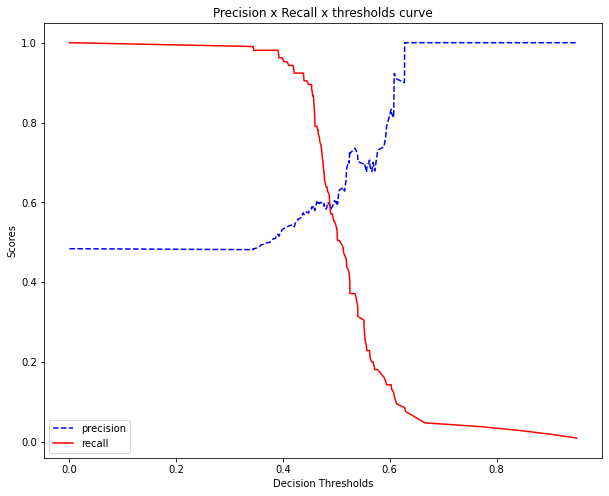

In [48]:
plt.figure(figsize=(10,8))
plt.title("Precision x Recall x thresholds curve")
plt.plot(th_svc,p_svc[:-1],'--',label="precision",color="blue")
plt.plot(th_svc,r_svc[:-1],'-',label="recall",color="red")
plt.ylabel("Scores")
plt.xlabel("Decision Thresholds")
plt.legend(loc="best")

<p>Para esse modelo de linear SVC, um bom ponto de equilíbrio de precision e recall ocorre com 
uma decision threshold abaixo de 0.5, em torno de 0.45 e 0.47, para obtermos um recall em torno de 70 % e precision proximo de 60%. Abaixo vamos verificar os resultados obtidos para esse valor. </p>

In [49]:
y_pred_adj_svc = adjusted_scores(y_clf_scores_svc[:,1],0.47)

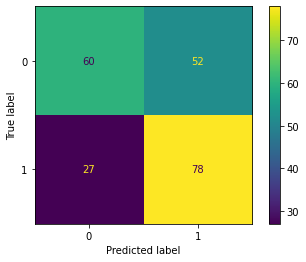

In [50]:
cm_svc_balanc = confusion_matrix(y2_test, y_pred_adj_svc)

cm_svc_balanc_disp = ConfusionMatrixDisplay(cm_svc_balanc).plot()

In [51]:
#aplicando no dataset real
y_scores_svc_imbal = cclf.predict_proba(X_test)


In [52]:
y_pred_adj_svc2 = adjusted_scores(y_scores_svc_imbal[:,1],0.47)

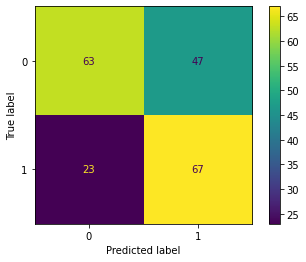

In [53]:
cm_svc_imbalanc = confusion_matrix(y_test, y_pred_adj_svc2)

cm_svc_imbalanc_disp = ConfusionMatrixDisplay(cm_svc_imbalanc).plot()

<p> Aqui vamos analisar os valores de precision, recall e AUC (área sob a curva - do gráfico de relação dos falsos positivos e e verdadeiros positivos) para os novos valores de decision thresehold. A AUC vai nos dizer se os dados estão bem ajustados ao modelo e se existiu ou não under/overfiting.</p>
<p> Treinamos o modelo com os dados baleanceados, contudo, o modelo não irá encontrar valores baleanceados quando tiver sendo aplicado na realidade. Dito isso, é importante analisar como ele irá se adaptar aos valores não baleanceados com o decision thresehold diferente. Abaixo, a função cross_vall_precision_recall vai analisar justamente essa resposta.   </p>

In [54]:
#função para fazer o cross validation com os dados reais e novo decision threshold
def cross_val_precision_recall(model,X,Y,KFolds,t):
    n_folds = KFolds.n_splits
    results = {"precision_values_train":[],"recall_values_train":[],"AUC_train":[],
             "precision_values_teste":[],"recall_values_teste":[],"AUC_teste":[]}
    for train_index,test_index in KFolds.split(X,Y):
            #sepearating the train data and test data
            X_cv_train,X_cv_test = X.loc[X.index.intersection(train_index)],X.loc[X.index.intersection(test_index)]
            y_cv_train,y_cv_test = Y.loc[Y.index.intersection(train_index)],Y.loc[Y.index.intersection(test_index)]

            X_cv_train_resamp, y_cv_train_resamp = BorderlineSMOTE().fit_resample(X_cv_train, y_cv_train)
            #fitting the model
            model.fit(X_cv_train_resamp,y_cv_train_resamp)
            
            #getting the train predict proba
            y_cv_train_predict_proba = model.predict_proba(X_cv_train_resamp)
            AUC_train = roc_auc_score(y_cv_train_resamp,y_cv_train_predict_proba[:,1])
            results["AUC_train"].append(AUC_train)
            y_cv_train_pred_adj = adjusted_scores(y_cv_train_predict_proba[:,1],t)
            
            
            #getting the testing predict proba
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            AUC = roc_auc_score(y_cv_test,y_cv_test_predict_proba[:,1])
            results["AUC_teste"].append(AUC)
            y_cv_test_pred_adj = adjusted_scores(y_cv_test_predict_proba[:,1],t)
            
           #getting the confusion matrix and calculating the precision and recall 
            tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_cv_train_resamp, y_cv_train_pred_adj).ravel()
            recall_train = tp_train/(tp_train+fn_train)
            results["recall_values_train"].append(recall_train)
            precision_train = tp_train/(tp_train+fp_train)
            results["precision_values_train"].append(precision_train)
            
            
            tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_cv_test, y_cv_test_pred_adj).ravel()
            recall_test = tp_test/(tp_test+fn_test)
            results["recall_values_teste"].append(recall_test)
            precision_test = tp_test/(tp_test+fp_test)
            results["precision_values_teste"].append(precision_test)
            

        
    return results

In [55]:
results_logreg = cross_val_precision_recall(clf_test,X,Y,KFolds,0.46)
results_logreg

{'precision_values_train': [0.6746203904555315,
  0.6680327868852459,
  0.6619144602851323,
  0.6579476861167002,
  0.6715176715176715],
 'recall_values_train': [0.7300469483568075,
  0.7477064220183486,
  0.7505773672055427,
  0.7551963048498845,
  0.7408256880733946],
 'AUC_train': [0.7588496550508057,
  0.7651607608787138,
  0.7526921579399325,
  0.7607406301169668,
  0.755939104452487],
 'precision_values_teste': [0.5526315789473685,
  0.6138613861386139,
  0.6086956521739131,
  0.6176470588235294,
  0.6326530612244898],
 'recall_values_teste': [0.7411764705882353,
  0.6526315789473685,
  0.7608695652173914,
  0.6847826086956522,
  0.6526315789473685],
 'AUC_teste': [0.7158056265984655,
  0.6996491228070176,
  0.7447665056360709,
  0.7321859903381642,
  0.7258145363408522]}

In [56]:
#calculando as médias gerais
#logistic regression
media_auc_train = np.mean(results_logreg["AUC_train"])
media_auc_teste = np.mean(results_logreg["AUC_teste"])
media_precision_train = np.mean(results_logreg["precision_values_train"])
media_precision_teste = np.mean(results_logreg["precision_values_teste"])
media_recall_train = np.mean(results_logreg["recall_values_train"])
media_recall_teste = np.mean(results_logreg["recall_values_teste"])

In [57]:
print(f"média dos valores de AUC no conjunto de treinamento: {media_auc_train:.2f}")
print(f"média dos valores de AUC no conjunto de teste: {media_auc_teste:.2f}")

média dos valores de AUC no conjunto de treinamento: 0.76
média dos valores de AUC no conjunto de teste: 0.72


In [58]:
print(f"média dos valores de precisão no conjunto de treinamento: {media_precision_train:.2f}")
print(f"média dos valores de precisão no cojunto de teste: {media_precision_teste:.2f}")

média dos valores de precisão no conjunto de treinamento: 0.67
média dos valores de precisão no cojunto de teste: 0.61


In [59]:
print(f"média de recall no conjunto de treinamento: {media_recall_train:.2f}")
print(f"média de recall no conjunto de teste: {media_recall_teste:.2f}")

média de recall no conjunto de treinamento: 0.74
média de recall no conjunto de teste: 0.70


In [60]:
results_svc = cross_val_precision_recall(cclf,X,Y,KFolds,0.47)
results_svc

{'precision_values_train': [0.6618852459016393,
  0.6514285714285715,
  0.6593186372745491,
  0.6378986866791745,
  0.6492985971943888],
 'recall_values_train': [0.7582159624413145,
  0.7844036697247706,
  0.7598152424942263,
  0.7852193995381063,
  0.7431192660550459],
 'AUC_train': [0.7464954043509886,
  0.7636378461408972,
  0.7520574540373037,
  0.7537455530724468,
  0.7440845677973236],
 'precision_values_teste': [0.5491803278688525,
  0.6055045871559633,
  0.5982905982905983,
  0.5609756097560976,
  0.63],
 'recall_values_teste': [0.788235294117647,
  0.6947368421052632,
  0.7608695652173914,
  0.75,
  0.6631578947368421],
 'AUC_teste': [0.720613810741688,
  0.6892230576441103,
  0.7376207729468599,
  0.7174919484702094,
  0.7169924812030075]}

In [61]:
media_auc_train_svc = np.mean(results_svc["AUC_train"])
media_auc_teste_svc = np.mean(results_svc["AUC_teste"])
media_precision_train_svc = np.mean(results_svc["precision_values_train"])
media_precision_teste_svc = np.mean(results_svc["precision_values_teste"])
media_recall_train_svc = np.mean(results_svc["recall_values_train"])
media_recall_teste_svc = np.mean(results_svc["recall_values_teste"])

In [62]:
print(f"média dos valores de AUC no conjunto de treinamento: {media_auc_train_svc:.2f}")
print(f"média dos valores de AUC no conjunto de teste: {media_auc_teste_svc:.2f}")

média dos valores de AUC no conjunto de treinamento: 0.75
média dos valores de AUC no conjunto de teste: 0.72


In [63]:
print(f"média dos valores de precisão no conjunto de treinamento: {media_precision_train_svc:.2f}")
print(f"média dos valores de precisão no cojunto de teste: {media_precision_teste_svc:.2f}")

média dos valores de precisão no conjunto de treinamento: 0.65
média dos valores de precisão no cojunto de teste: 0.59


In [64]:
print(f"média de recall no conjunto de treinamento: {media_recall_train_svc:.2f}")
print(f"média de recall no conjunto de teste: {media_recall_teste_svc:.2f}")

média de recall no conjunto de treinamento: 0.77
média de recall no conjunto de teste: 0.73


<p> Vamos armazenar os dados em um dict para poder comparar diferentes modelos ao final da análise. </p>

In [205]:
models_results = {
    "models":[],
    "auc_train":[],
    "auc_test":[],
    "precision_train":[],
    "precision_test":[],
    "recall_train":[],
    "recall_test":[]
}

In [206]:
#adicionando dados da logistic regression
models_results["models"].append(clf_test)
models_results["auc_train"].append(str(round(np.mean(results_logreg["AUC_train"]),2))+ " +/- " +
                             str(round(np.std(results_logreg["AUC_train"]),2)))
models_results["auc_test"].append(str(round(np.mean(results_logreg["AUC_teste"]),2))+ " +/- " +
                             str(round(np.std(results_logreg["AUC_teste"]),2)))
models_results["precision_train"].append(str(round(np.mean(results_logreg["precision_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_logreg["precision_values_train"]),2)))
models_results["precision_test"].append(str(round(np.mean(results_logreg["precision_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_logreg["precision_values_teste"]),2)))
models_results["recall_train"].append(str(round(np.mean(results_logreg["recall_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_logreg["recall_values_train"]),2)))

models_results["recall_test"].append(str(round(np.mean(results_logreg["recall_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_logreg["recall_values_teste"]),2)))



In [207]:
#adicionando dados da LinearSVC
models_results["models"].append(cclf.base_estimator)
models_results["auc_train"].append(str(round(np.mean(results_svc["AUC_train"]),2))+ " +/- " +
                             str(round(np.std(results_svc["AUC_train"]),2)))
models_results["auc_test"].append(str(round(np.mean(results_svc["AUC_teste"]),2))+ " +/- " +
                             str(round(np.std(results_svc["AUC_teste"]),2))) 
models_results["precision_train"].append(str(round(np.mean(results_svc["precision_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_svc["precision_values_train"]),2)))
models_results["precision_test"].append(str(round(np.mean(results_svc["precision_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_svc["precision_values_teste"]),2)))
models_results["recall_train"].append(str(round(np.mean(results_svc["recall_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_svc["recall_values_train"]),2)))
models_results["recall_test"].append(str(round(np.mean(results_svc["recall_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_svc["recall_values_teste"]),2)))

In [68]:
models_results

{'models': [LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear',
                     tol=0.001),
  LinearSVC(C=0.1, dual=False, penalty='l1', random_state=0, tol=0.001)],
 'auc_train': ['0.76 +/- 0.0', '0.75 +/- 0.01'],
 'auc_test': ['0.72 +/- 0.02', '0.72 +/- 0.02'],
 'precision_train': ['0.67 +/- 0.01', '0.65 +/- 0.01'],
 'precision_test': ['0.61 +/- 0.03', '0.59 +/- 0.03'],
 'recall_train': ['0.74 +/- 0.01', '0.77 +/- 0.02'],
 'recall_test': ['0.7 +/- 0.04', '0.73 +/- 0.05']}

<p> A partir do que foi feito para os modelos lineares (logistic regression e linearSVC) é possível analisar também para as árvores de decisão. A vantagens delas é poder analisar comportamentos não lineares das variáveis em X. Contudo, nesse caso o hiperparametro C não existe e são procurados ajustar outros valores como profundiade da árvore e o máximo de folhas por nó. </p>
<p> Em uma árvore de decisão é importante que ela não seja tão grande pois isso significa que ao invés dela genaralizar ela está apredendo comportamentos muito específicos os quais não acontecem com tanta frequência na realidade por isso é importante analisar e procurar os valores de profundidade que evitam o overfitting realizado o grid search e o cross validation feitos anteiormente</p>

In [ ]:
## decision tree

In [69]:
depth_values = np.linspace(3,20,8).round()

In [70]:
depth_values

array([ 3.,  5.,  8., 10., 13., 15., 18., 20.])

In [71]:
max_leaf_nodes = np.arange(9,17,1)
max_leaf_nodes

array([ 9, 10, 11, 12, 13, 14, 15, 16])

In [72]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=12)

In [73]:
def cross_val_depth_selection_grid_search(model,X,Y,KFolds,get_params):
    n_folds = KFolds.n_splits
    results = {"max_depth":[],"max_leaf_nodes":[],"mean_train_score":[],"mean_test_score":[]}
    for train_index,test_index in KFolds.split(X,Y):
        X_cv_train,X_cv_test = X.loc[X.index.intersection(train_index)],X.loc[X.index.intersection(test_index)]
        y_cv_train,y_cv_test = Y.loc[Y.index.intersection(train_index)],Y.loc[Y.index.intersection(test_index)]
        
        #searching the best param for that split 
        clf = GridSearchCV(model,get_params,scoring="roc_auc")
        clf.fit(X_cv_train,y_cv_train)
        
        #getting the best C
        best_depth = clf.best_params_["max_depth"]
        best_max_leafs = clf.best_params_["max_leaf_nodes"]
        
        #creating a model with the best C and tuning params
        model.max_depth = best_depth
        model.max_leaf_nodes = best_max_leafs
        model.fit(X_cv_train,y_cv_train)
        results["max_depth"].append(best_depth)
        results["max_leaf_nodes"].append(best_max_leafs)
        
        #adding the mean train score 
        results["mean_train_score"].append(clf.best_score_)
        
        #getting the mean test score
        mean_test_score = cross_val_score(model,X_cv_test,y_cv_test,cv=5,scoring="roc_auc")
        results["mean_test_score"].append(np.mean(mean_test_score))

    return results


In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model_tree = DecisionTreeClassifier(random_state=8)
model_tree

DecisionTreeClassifier(random_state=8)

In [76]:
cross_val_depth_selection_grid_search(model_tree,X3_train,y3_train,KFolds,{"max_depth":depth_values,
                                                                           "max_leaf_nodes":max_leaf_nodes})

{'max_depth': [8.0, 5.0, 3.0, 5.0, 5.0],
 'max_leaf_nodes': [16, 10, 9, 13, 12],
 'mean_train_score': [0.6319316508577886,
  0.6202812628137082,
  0.6355190524218346,
  0.6482554613323336,
  0.6887106734448574],
 'mean_test_score': [0.6357772435897436,
  0.5623489010989011,
  0.6777683854606931,
  0.5979094714809,
  0.5988042909471482]}

In [77]:
#aumentando o numero de divisões
KFolds2 = KFold(n_splits=7, random_state=None, shuffle=False)
KFolds2

KFold(n_splits=7, random_state=None, shuffle=False)

In [78]:
cross_val_depth_selection_grid_search(model_tree,X3_train,y3_train,KFolds2,{"max_depth":depth_values,
                                                                           "max_leaf_nodes":max_leaf_nodes})

{'max_depth': [8.0, 5.0, 8.0, 8.0, 8.0, 8.0, 5.0],
 'max_leaf_nodes': [11, 9, 13, 12, 9, 9, 10],
 'mean_train_score': [0.637803173295264,
  0.6072464667813928,
  0.6540443851564395,
  0.6450363026241199,
  0.6501385632540131,
  0.6388859255823542,
  0.6764154778864105],
 'mean_test_score': [0.6875000000000001,
  0.6251818181818182,
  0.4981515151515151,
  0.6611111111111111,
  0.5628888888888889,
  0.5344949494949496,
  0.4952272727272726]}

In [79]:
clf = DecisionTreeClassifier(max_depth=8,max_leaf_nodes=9,random_state=24)
clf.fit(X3_train,y3_train)


DecisionTreeClassifier(max_depth=8, max_leaf_nodes=9, random_state=24)

In [80]:
clf_train_predict = clf.predict(X3_train)
roc_auc_score(y3_train,clf_train_predict)

0.656760374832664

In [81]:
y3_test_predict = clf.predict(X3_test)
roc_auc_score(y3_test,y3_test_predict)

0.605006105006105

In [82]:
y_clf_scores_dt = clf.predict_proba(X3_test)

In [83]:
#verificando a curva de precision e recall para o modelo de decision tree
p_dt,r_dt,th_dt = precision_recall_curve(y3_test,y_clf_scores_dt[:,1])

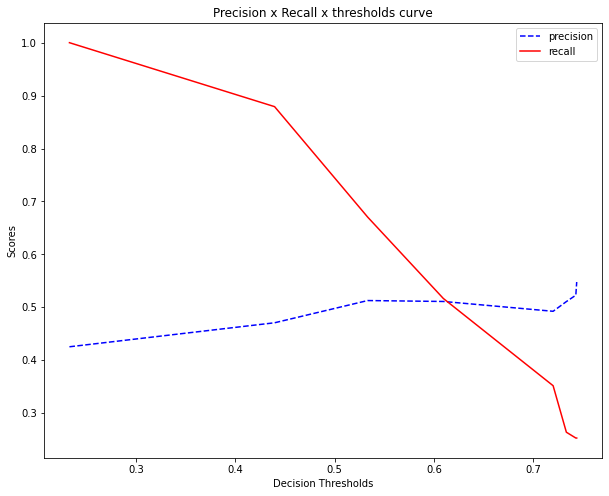

In [84]:
plt.figure(figsize=(10,8))
plt.title("Precision x Recall x thresholds curve")
plt.plot(th_dt,p_dt[:-1],'--',label="precision",color="blue")
plt.plot(th_dt,r_dt[:-1],'-',label="recall",color="red")
plt.ylabel("Scores")
plt.xlabel("Decision Thresholds")
plt.legend(loc="best")

In [147]:
y_pred_adj_dt= adjusted_scores(y_clf_scores_dt[:,1],0.51)

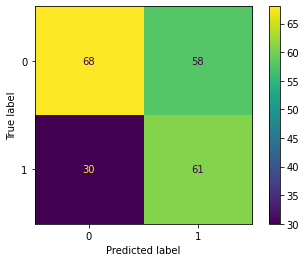

In [148]:
#analisando a matriz confusão para dados balanceados
cm_dt_balanc = confusion_matrix(y3_test, y_pred_adj_dt)

cm_dt_balanc_disp = ConfusionMatrixDisplay(cm_dt_balanc).plot()

In [149]:
#aplicando no dataset real
y_scores_dt_imbal = clf.predict_proba(X3_test)

In [150]:
y_pred_adj_dt2 = adjusted_scores(y_scores_dt_imbal[:,1],0.51)

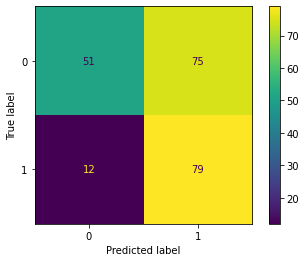

In [151]:
cm_dt_imbalanc = confusion_matrix(y3_test, y_pred_adj_dt2)

cm_dt_imbalanc_disp = ConfusionMatrixDisplay(cm_dt_imbalanc).plot()

In [105]:
#realizando o cross validantion com decision thresold de 0.51 no dataset real
results_dt = cross_val_precision_recall(clf,X,Y,KFolds,0.51)
results_dt

{'precision_values_train': [0.6346153846153846,
  0.6117455138662317,
  0.6538461538461539,
  0.6265306122448979,
  0.5953846153846154],
 'recall_values_train': [0.6971830985915493,
  0.8600917431192661,
  0.628175519630485,
  0.7090069284064665,
  0.8876146788990825],
 'AUC_train': [0.6927720469924398,
  0.7047597003619224,
  0.6965341966728715,
  0.6962195115446773,
  0.692510626209915],
 'precision_values_teste': [0.5229357798165137,
  0.562962962962963,
  0.5922330097087378,
  0.5714285714285714,
  0.5652173913043478],
 'recall_values_teste': [0.6705882352941176,
  0.8,
  0.6630434782608695,
  0.6956521739130435,
  0.8210526315789474],
 'AUC_teste': [0.6718158567774937,
  0.6486215538847118,
  0.6896638486312399,
  0.6571557971014492,
  0.6287218045112781]}

In [106]:
media_auc_train2 = np.mean(results_dt["AUC_train"])
media_auc_teste2 = np.mean(results_dt["AUC_teste"])
media_precision_train2 = np.mean(results_dt["precision_values_train"])
media_precision_teste2 = np.mean(results_dt["precision_values_teste"])
media_recall_train2 = np.mean(results_dt["recall_values_train"])
media_recall_teste2 = np.mean(results_dt["recall_values_teste"])

In [107]:
print(f"média dos valores de AUC no conjunto de treinamento: {media_auc_train2:.2f}")
print(f"média dos valores de AUC no conjunto de teste: {media_auc_teste2:.2f}")

média dos valores de AUC no conjunto de treinamento: 0.70
média dos valores de AUC no conjunto de teste: 0.66


In [108]:
print(f"média dos valores de precisão no conjunto de treinamento: {media_precision_train2:.2f}")
print(f"média dos valores de precisão no conjunto de teste: {media_precision_teste2:.2f}")

média dos valores de precisão no conjunto de treinamento: 0.62
média dos valores de precisão no conjunto de teste: 0.56


In [109]:
print(f"média dos valores de recall no conjunto de treinamento: {media_recall_train2:.2f}")
print(f"média dos valores de recall no conjunto de teste: {media_recall_teste2:.2f}")

média dos valores de recall no conjunto de treinamento: 0.76
média dos valores de recall no conjunto de teste: 0.73


In [110]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
n_estimators = np.arange(10,150,20)
n_estimators

array([ 10,  30,  50,  70,  90, 110, 130])

In [111]:
model_random_forest = RandomForestClassifier(max_depth=3,n_estimators=10,random_state=10)

In [112]:
def cross_val_depth_estimator_selection_grid_search(model,X,Y,KFolds,get_params):
    n_folds = KFolds.n_splits
    results = {"max_depth":[],"n_estimators":[],"mean_train_score":[],"mean_test_score":[]}
    for train_index,test_index in KFolds.split(X,Y):
        X_cv_train,X_cv_test = X.loc[X.index.intersection(train_index)],X.loc[X.index.intersection(test_index)]
        y_cv_train,y_cv_test = Y.loc[Y.index.intersection(train_index)],Y.loc[Y.index.intersection(test_index)]
        
        #searching the best param for that split 
        clf = GridSearchCV(model_random_forest,scoring="roc_auc",
                   param_grid={"max_depth":depth_values,"n_estimators":n_estimators})
        clf.fit(X_cv_train,y_cv_train)
        
        #getting the best estimator
        best_depth = clf.best_estimator_.max_depth
        best_n_estimators = clf.best_estimator_.n_estimators
        results["max_depth"].append(best_depth)
        results["n_estimators"].append(best_n_estimators)
        
        #creating a model with the best C and tuning params
        model.max_depth = best_depth
        model.n_estimators = best_n_estimators
        model.fit(X_cv_train,y_cv_train)
    
        
        #adding the mean train score 
        results["mean_train_score"].append(clf.best_score_)
        
        #getting the mean test score
        mean_test_score = cross_val_score(model,X_cv_test,y_cv_test,cv=5,scoring="roc_auc")
        results["mean_test_score"].append(np.mean(mean_test_score))

    return results


In [113]:
cross_val_depth_estimator_selection_grid_search(model_random_forest,X3_train,y3_train,KFolds,
                                                {"max_depth":depth_values,"n_estimators":n_estimators})

{'max_depth': [3.0, 3.0, 3.0, 3.0, 3.0],
 'n_estimators': [50, 130, 110, 30, 30],
 'mean_train_score': [0.7003937740203421,
  0.6971456216739236,
  0.6917868666617467,
  0.7116741836948491,
  0.7104799135449864],
 'mean_test_score': [0.7252644230769231,
  0.6443269230769231,
  0.7328825021132713,
  0.6448220826792257,
  0.6621009942438514]}

In [114]:
clf_rand_forest = RandomForestClassifier(max_depth=3,n_estimators=30,random_state=12)

In [115]:
clf_rand_forest.fit(X3_train,y3_train)

RandomForestClassifier(max_depth=3, n_estimators=30, random_state=12)

In [116]:
y_clf_scores_randforest = clf_rand_forest.predict_proba(X3_test)

In [117]:
#precision recall curve para random forest
p_rf,r_rf,th_rf = precision_recall_curve(y3_test,y_clf_scores_randforest[:,1])

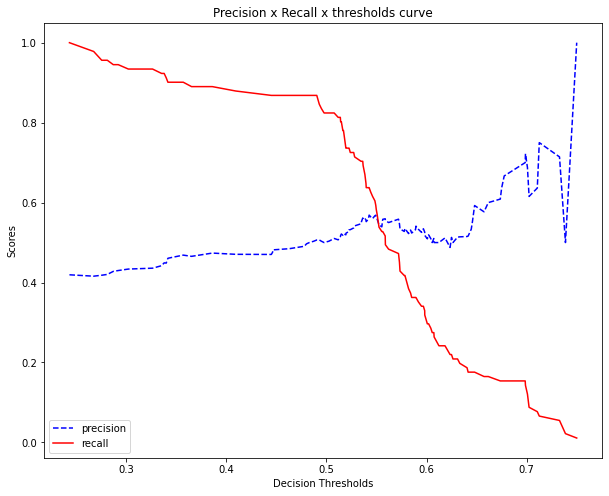

In [118]:
plt.figure(figsize=(10,8))
plt.title("Precision x Recall x thresholds curve")
plt.plot(th_rf,p_rf[:-1],'--',label="precision",color="blue")
plt.plot(th_rf,r_rf[:-1],'-',label="recall",color="red")
plt.ylabel("Scores")
plt.xlabel("Decision Thresholds")
plt.legend(loc="best")

In [ ]:
#analisando a matriz confusão da random forest 

In [192]:
y_pred_adj_rf= adjusted_scores(y_clf_scores_randforest[:,1],0.51)

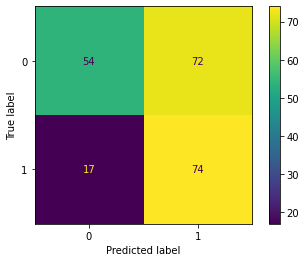

In [193]:
#analisando a matriz confusão para dados balanceados
cm_rf_balanc = confusion_matrix(y3_test, y_pred_adj_rf)

cm_rf_balanc_disp = ConfusionMatrixDisplay(cm_rf_balanc).plot()

In [155]:
#aplicando no dataset real
y_scores_rf_imbal = clf_rand_forest.predict_proba(X_test)

In [194]:
y_pred_adj_rf2 = adjusted_scores(y_scores_rf_imbal[:,1],0.51)

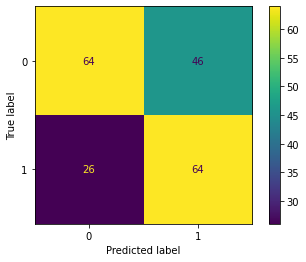

In [195]:
cm_rf_imbalanc = confusion_matrix(y_test, y_pred_adj_rf2)

cm_rf_imbalanc_disp = ConfusionMatrixDisplay(cm_rf_imbalanc).plot()

In [ ]:
#realizando o cross validation com o valor de threshold de 0.51 no dataset real

In [196]:
results_rf = cross_val_precision_recall(clf_rand_forest,X,Y,KFolds,0.51)
results_rf

{'precision_values_train': [0.6623093681917211,
  0.655011655011655,
  0.6476793248945147,
  0.6403846153846153,
  0.6546610169491526],
 'recall_values_train': [0.7136150234741784,
  0.6444954128440367,
  0.7090069284064665,
  0.76905311778291,
  0.7087155963302753],
 'AUC_train': [0.7286831316537723,
  0.7232635089638919,
  0.7105883545167984,
  0.7206502781496514,
  0.7244050374547597],
 'precision_values_teste': [0.5689655172413793,
  0.6063829787234043,
  0.6068376068376068,
  0.5714285714285714,
  0.65],
 'recall_values_teste': [0.7764705882352941,
  0.6,
  0.7717391304347826,
  0.6956521739130435,
  0.6842105263157895],
 'AUC_teste': [0.7180051150895139,
  0.6838095238095238,
  0.7237822061191627,
  0.7115539452495974,
  0.729172932330827]}

In [197]:
media_auc_train3 = np.mean(results_rf["AUC_train"])
media_auc_teste3 = np.mean(results_rf["AUC_teste"])
media_precision_train3 = np.mean(results_rf["precision_values_train"])
media_precision_teste3 = np.mean(results_rf["precision_values_teste"])
media_recall_train3 = np.mean(results_rf["recall_values_train"])
media_recall_teste3 = np.mean(results_rf["recall_values_teste"])

In [198]:
print(f"média dos valores de AUC no conjunto de treinamento: {media_auc_train3:.2f}")
print(f"média dos valores de AUC no conjunto de teste: {media_auc_teste3:.2f}")

média dos valores de AUC no conjunto de treinamento: 0.72
média dos valores de AUC no conjunto de teste: 0.71


In [199]:
print(f"média dos valores de precisão no conjunto de treinamento: {media_precision_train3:.2f}")
print(f"média dos valores de precisão no conjunto de teste: {media_precision_teste3:.2f}")

média dos valores de precisão no conjunto de treinamento: 0.65
média dos valores de precisão no conjunto de teste: 0.60


In [200]:
print(f"média dos valores de recall no conjunto de treinamento: {media_recall_train3:.2f}")
print(f"média dos valores de recall no conjunto de teste: {media_recall_teste3:.2f}")

média dos valores de recall no conjunto de treinamento: 0.71
média dos valores de recall no conjunto de teste: 0.71


In [208]:
#adicionando dados da decision tree 
models_results["models"].append(clf)
models_results["auc_train"].append(str(round(np.mean(results_dt["AUC_train"]),2))+ " +/- " +
                             str(round(np.std(results_dt["AUC_train"]),2)))
models_results["auc_test"].append(str(round(np.mean(results_dt["AUC_teste"]),2))+ " +/- " +
                             str(round(np.std(results_dt["AUC_teste"]),2)))
models_results["precision_train"].append(str(round(np.mean(results_dt["precision_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_dt["precision_values_train"]),2)))
models_results["precision_test"].append(str(round(np.mean(results_dt["precision_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_dt["precision_values_teste"]),2)))
models_results["recall_train"].append(str(round(np.mean(results_dt["recall_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_dt["recall_values_train"]),2)))

models_results["recall_test"].append(str(round(np.mean(results_dt["recall_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_dt["recall_values_teste"]),2)))


In [209]:
#adicionando dados de random forest 
models_results["models"].append(clf_rand_forest)
models_results["auc_train"].append(str(round(np.mean(results_rf["AUC_train"]),2))+ " +/- " +
                             str(round(np.std(results_rf["AUC_train"]),2)))
models_results["auc_test"].append(str(round(np.mean(results_rf["AUC_teste"]),2))+ " +/- " +
                             str(round(np.std(results_rf["AUC_teste"]),2)))
models_results["precision_train"].append(str(round(np.mean(results_rf["precision_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_rf["precision_values_train"]),2)))
models_results["precision_test"].append(str(round(np.mean(results_rf["precision_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_rf["precision_values_teste"]),2)))
models_results["recall_train"].append(str(round(np.mean(results_rf["recall_values_train"]),2))+ " +/- " +
                             str(round(np.std(results_rf["recall_values_train"]),2)))

models_results["recall_test"].append(str(round(np.mean(results_rf["recall_values_teste"]),2))+ " +/- " +
                             str(round(np.std(results_rf["recall_values_teste"]),2)))


In [210]:
#analisando os resultados dos modelos obtidos 
df_results = pd.DataFrame(models_results)
df_results.sort_values(["recall_test"],ascending=False,ignore_index=True)

,models,auc_train,auc_test,precision_train,precision_test,recall_train,recall_test
0,"DecisionTreeClassifier(max_depth=8, max_leaf_n...",0.7 +/- 0.0,0.66 +/- 0.02,0.62 +/- 0.02,0.56 +/- 0.02,0.76 +/- 0.1,0.73 +/- 0.07
1,"LinearSVC(C=0.1, dual=False, penalty='l1', ran...",0.75 +/- 0.01,0.72 +/- 0.02,0.65 +/- 0.01,0.59 +/- 0.03,0.77 +/- 0.02,0.73 +/- 0.05
2,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.72 +/- 0.01,0.71 +/- 0.02,0.65 +/- 0.01,0.6 +/- 0.03,0.71 +/- 0.04,0.71 +/- 0.06
3,"LogisticRegression(C=1, penalty='l1', random_s...",0.76 +/- 0.0,0.72 +/- 0.02,0.67 +/- 0.01,0.61 +/- 0.03,0.74 +/- 0.01,0.7 +/- 0.04


<p> Todos os modelos tiverem bons auc_train e auc_test, logo, todos os modelos tiveram bom encaixe aos dados. Apesar disso, linearSVC e decision trees tiverem resultados finais similares para recall similares. Assim, analisando as outras colunas é visto que o linear SVC teve um melhor desempenho como um todo (olhando precisão e auc). Assim, vamos analisar quais variaveis são importantes para os dois modelos (pelo grau de importância de random forest e valores dos coeficientes pela svc)</p>

In [138]:
coef_svc = pd.DataFrame(data = df_results.loc[0]["models"].coef_.reshape(-1,1),index=X.columns,
                              columns=["grau de importancia"])

In [139]:
coef_svc

,grau de importancia
gender_female,0.772867
gender_male,0.199376
race/ethnicity_group A,0.028934
race/ethnicity_group B,0.096540
race/ethnicity_group C,0.292022
race/ethnicity_group D,0.699199
race/ethnicity_group E,0.974942
parental_level_of_education_associate's degree,0.561343
parental_level_of_education_bachelor's degree,0.867340
parental_level_of_education_high school,0.121029


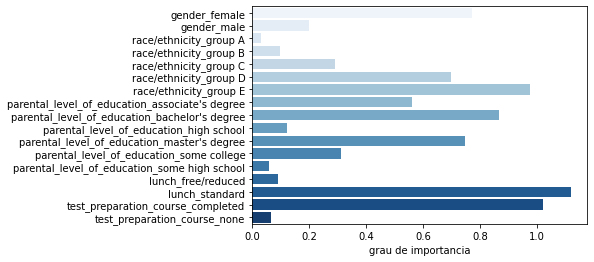

In [140]:
sns.barplot(x=coef_svc["grau de importancia"],y=coef_svc.index,palette="Blues")

<p> A partir do gráfico acima as variaveis mais importantes para definir aprovação são test_preparation_course e lunch, logo, para test_preparation_course_completed e lunch_standard com valores altos é um grande indicador de aluno aprovado. Dito isso, outras variaveis importantes são race/ethnicity (principalmente no grupo D e E) além de parental_level_of_education (com pesos altos para bachelor e masters) e gender (com maior peso para female). 
<p>Apesar de todas as variáveis terem certa importância nesse dataset para um caso com mais dados e atributos essa análise é importante para realizar uma redução ou filtragem de variáveis.</p>
<p>Por fim, mesmo com pequeno dataset conseguimos encontrar informações importantes a respeiro dos dados adquiridos. Ao se verificar caracteristicas importantes para definir a aprovação de alunos e conclui-se com essa análise também quais alunos estão correndo risco de reprovação ao se estudar quais alunos percetencem a grupos de menores pesos de aprovação.</p>